- loading data

In [42]:
! wget https://raw.githubusercontent.com/mohammedashrafdagga/ds_lr/main/dataset/melb_data.csv

--2022-01-28 12:49:20--  https://raw.githubusercontent.com/mohammedashrafdagga/ds_lr/main/dataset/melb_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2091239 (2.0M) [text/plain]
Saving to: ‘melb_data.csv.1’

melb_data.csv.1     100%[===================>]   1.99M  --.-KB/s    in 0.02s   

2022-01-28 12:49:21 (84.6 MB/s) - ‘melb_data.csv.1’ saved [2091239/2091239]



-- reading and importing libaray

In [43]:
# improt 
import pandas as pd

data_melb = pd.read_csv('melb_data.csv')

# looking a head of data
data_melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [44]:
data_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

-- definte X and y

In [45]:
y = data_melb['Price']
X = data_melb.drop('Price', axis = 1)

In [46]:
X.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [47]:
# some prerocessing brefore start
object_col = [col for col in X.columns if X[col].dtype == 'object']
col_with_more_10_uinuqe_value = [col for col in object_col if len( X[col].unique()) > 10]
print(object_col)
print(col_with_more_10_uinuqe_value)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']


In [48]:
X = X.drop(col_with_more_10_uinuqe_value, axis = 1)
X.columns

Index(['Rooms', 'Type', 'Method', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [49]:
# split numerical and category data
num_col = list(X.select_dtypes(exclude='object').columns)
object_col = [col for col in X.columns if X[col].dtype == 'object']
print(object_col)
print(num_col)

['Type', 'Method', 'Regionname']
['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [50]:
# import libaray used 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [51]:
# apply in numberical
simputer = SimpleImputer(strategy='constant')

# apply in categroy
cat_transformar = Pipeline(steps=[
                                  ('imputer', SimpleImputer(strategy='most_frequent')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# columns transformar
preprocessor = ColumnTransformer(transformers=[
                                               ('num', simputer, num_col),
                                               ('cat', cat_transformar, object_col)
])

In [52]:
# apply preprocssor and model by pipeline
def create_model(n_estimtor = 100):
  return  Pipeline(steps=[
                              ('preprocssor', preprocessor),
                              ('model', XGBRegressor(n_estimators=n_estimtor,  learning_rate=0.05, n_jobs=4))
  ])

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1, test_size=0.25 )

In [54]:
# n_estimtor
n_estimtor = []
c_error = []

In [55]:
# training model
for i in range(100,1100,100):
  model = create_model(n_estimtor= i )
  model.fit(X_train,y_train)
  n_estimtor.append(i)
  predictions = model.predict(X_test)
  print('when i is: ', i)
  mae = mean_absolute_error(predictions, y_test)
  c_error.append(round(mae))
  print("Mean Absolute Error: " , mae)
  print('--'*20)

[12:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
when i is:  100
Mean Absolute Error:  196215.29859167893
----------------------------------------
[12:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
when i is:  200
Mean Absolute Error:  182093.830849595
----------------------------------------
[12:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
when i is:  300
Mean Absolute Error:  175182.05222984168
----------------------------------------
[12:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
when i is:  400
Mean Absolute Error:  171134.10557805595
----------------------------------------
[12:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fa

In [56]:
# best is when number of estimtor is 1000

Text(0, 0.5, 'mae calcaluted')

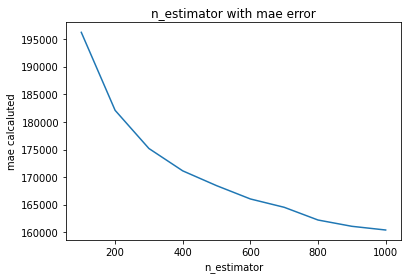

In [60]:
import matplotlib.pyplot as plt

plt.plot(n_estimtor, c_error)
plt.title("n_estimator with mae error")
plt.xlabel("n_estimator")
plt.ylabel("mae calcaluted")